Выбрана хромосома 3R и участок 8500000-10000000

In [ ]:
!pip install -q condacolab
!pip install cooler
!pip install cooltools
!pip install hicrep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 865.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=87726309699a0d2a4459cdc4ac6fc883aa7dd55398eb8598a4573f8b9f1dd091
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 28.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import condacolab
condacolab.install()
import cooler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from google.colab import drive
drive.mount('/content/drive')

✨🍰✨ Everything looks OK!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mcool1 = '/content/drive/MyDrive/hic/HiC1.dm3.mapq_30.1000.mcool'
mcool2 = '/content/drive/MyDrive/hic/HiC2.dm3.mapq_30.1000.mcool'
mcool3 = '/content/drive/MyDrive/hic/HiC3.dm3.mapq_30.1000.mcool'
mcool4 = '/content/drive/MyDrive/hic/HiC4.dm3.mapq_30.1000.mcool'

In [ ]:
resolution = 20000
clr1 = cooler.Cooler(f'{mcool1}::resolutions/{resolution}')
clr2 = cooler.Cooler(f'{mcool2}::resolutions/{resolution}')
clr3 = cooler.Cooler(f'{mcool3}::resolutions/{resolution}')
clr4 = cooler.Cooler(f'{mcool4}::resolutions/{resolution}')

a. получить информацию и атрибуты матрицы Hi-C с помощью cooler.info

In [ ]:
clr1.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:39:00.281457',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 7122786,
 'storage-mode': 'symmetric-upper',
 'sum': 63912926}

In [ ]:
clr2.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:16:47.610855',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 7386462,
 'storage-mode': 'symmetric-upper',
 'sum': 61819050}

In [ ]:
clr3.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:23:11.844138',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 4852836,
 'storage-mode': 'symmetric-upper',
 'sum': 62878716}

In [ ]:
clr4.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:53:24.060433',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 5689703,
 'storage-mode': 'symmetric-upper',
 'sum': 74497702}

b. открыть объект cooler как сбалансированную матрицу для внутрихромосомных контактов


In [ ]:
matr1 = clr1.matrix(balance=True).fetch('chr3R')
matr1

array([[4.57261128,        nan, 0.1188454 , ..., 0.        , 0.        ,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.1188454 ,        nan, 0.87907631, ..., 0.        , 0.        ,
               nan],
       ...,
       [0.        ,        nan, 0.        , ..., 0.86306595, 0.13748887,
               nan],
       [0.        ,        nan, 0.        , ..., 0.13748887, 0.98635821,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [ ]:
matr2 = clr2.matrix(balance=True).fetch('chr3R')
matr2

array([[3.55366946e+00, 4.13773508e-01, 1.19128336e-01, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [4.13773508e-01, 3.79774558e+00, 3.22483231e-01, ...,
        3.67719129e-04, 4.42879543e-04,            nan],
       [1.19128336e-01, 3.22483231e-01, 7.69839593e-01, ...,
        0.00000000e+00, 1.37381591e-04,            nan],
       ...,
       [0.00000000e+00, 3.67719129e-04, 0.00000000e+00, ...,
        7.14503555e-01, 1.44528949e-01,            nan],
       [0.00000000e+00, 4.42879543e-04, 1.37381591e-04, ...,
        1.44528949e-01, 8.75218361e-01,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

In [ ]:
matr3 = clr3.matrix(balance=True).fetch('chr3R')
matr3

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 2.66519091, 0.4292398 , ..., 0.        , 0.        ,
               nan],
       [       nan, 0.4292398 , 0.86574694, ..., 0.        , 0.        ,
               nan],
       ...,
       [       nan, 0.        , 0.        , ..., 0.92551945, 0.25743113,
               nan],
       [       nan, 0.        , 0.        , ..., 0.25743113, 1.47527377,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [ ]:
matr4 = clr4.matrix(balance=True).fetch('chr3R')
matr4

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 1.75678488, 0.3587562 , ..., 0.        ,        nan,
               nan],
       [       nan, 0.3587562 , 0.65668031, ..., 0.        ,        nan,
               nan],
       ...,
       [       nan, 0.        , 0.        , ..., 0.73593562,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

<ipython-input-12-ea6c631871be>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr1[425:500,425:500]),cmap='coolwarm')


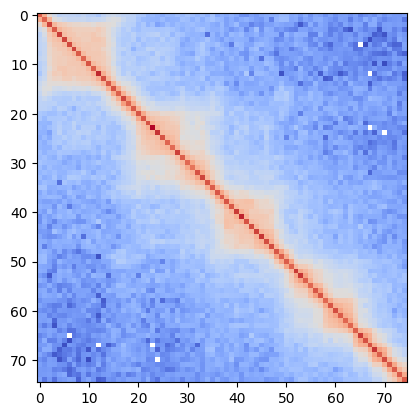

In [ ]:
plt.imshow(np.log(matr1[425:500,425:500]),cmap='coolwarm')

<ipython-input-13-8a3fb3ac5a26>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr2[425:500,425:500]),cmap='coolwarm')


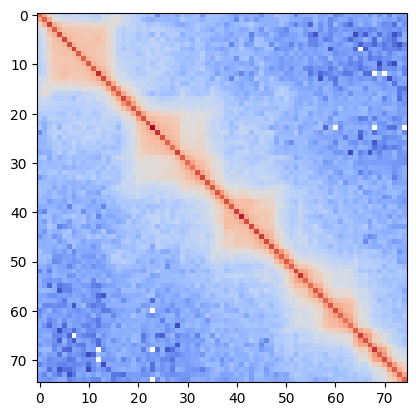

In [ ]:
plt.imshow(np.log(matr2[425:500,425:500]),cmap='coolwarm')

<ipython-input-14-8dbd47f21187>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr3[425:500,425:500]),cmap='coolwarm')


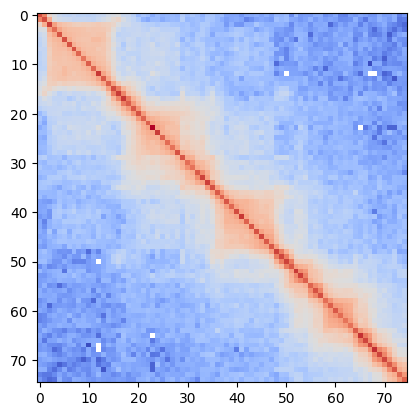

In [ ]:
plt.imshow(np.log(matr3[425:500,425:500]),cmap='coolwarm')

<ipython-input-15-7923bfe07091>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr4[425:500,425:500]),cmap='coolwarm')


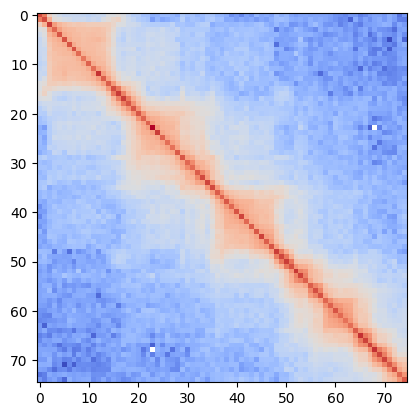

In [ ]:
plt.imshow(np.log(matr4[425:500,425:500]),cmap='coolwarm')

c. получить таблицу с координатами и контактами, они сбалансированные или нет?


In [ ]:
pix1 = clr1.pixels(join=True)[:]
pix1

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,20000,chr2L,0,20000,4075
1,chr2L,0,20000,chr2L,20000,40000,481
2,chr2L,0,20000,chr2L,40000,60000,182
3,chr2L,0,20000,chr2L,60000,80000,183
4,chr2L,0,20000,chr2L,80000,100000,84
...,...,...,...,...,...,...,...
7122781,chrX,22380000,22400000,chrX,22420000,22422827,14
7122782,chrX,22400000,22420000,chrX,22400000,22420000,1694
7122783,chrX,22400000,22420000,chrX,22420000,22422827,27
7122784,chrX,22420000,22422827,chrX,22420000,22422827,244


In [ ]:
pix2 = clr2.pixels(join=True)[:]
pix2

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,20000,chr2L,0,20000,3785
1,chr2L,0,20000,chr2L,20000,40000,527
2,chr2L,0,20000,chr2L,40000,60000,212
3,chr2L,0,20000,chr2L,60000,80000,156
4,chr2L,0,20000,chr2L,80000,100000,88
...,...,...,...,...,...,...,...
7386457,chrX,22380000,22400000,chrX,22420000,22422827,13
7386458,chrX,22400000,22420000,chrX,22400000,22420000,1537
7386459,chrX,22400000,22420000,chrX,22420000,22422827,24
7386460,chrX,22420000,22422827,chrX,22420000,22422827,160


In [ ]:
pix3 = clr3.pixels(join=True)[:]
pix3

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,20000,chr2L,0,20000,2
1,chr2L,0,20000,chr2L,40000,60000,1
2,chr2L,0,20000,chr2L,380000,400000,1
3,chr2L,0,20000,chr2L,5800000,5820000,1
4,chr2L,0,20000,chr2R,6040000,6060000,1
...,...,...,...,...,...,...,...
4852831,chrX,22380000,22400000,chrX,22420000,22422827,36
4852832,chrX,22400000,22420000,chrX,22400000,22420000,1681
4852833,chrX,22400000,22420000,chrX,22420000,22422827,28
4852834,chrX,22420000,22422827,chrX,22420000,22422827,195


In [ ]:
pix4 = clr4.pixels(join=True)[:]
pix4

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,20000,chr2L,0,20000,1
1,chr2L,40000,60000,chr2L,40000,60000,58
2,chr2L,40000,60000,chr2L,60000,80000,111
3,chr2L,40000,60000,chr2L,80000,100000,30
4,chr2L,40000,60000,chr2L,100000,120000,16
...,...,...,...,...,...,...,...
5689698,chrX,22380000,22400000,chrX,22420000,22422827,41
5689699,chrX,22400000,22420000,chrX,22400000,22420000,1872
5689700,chrX,22400000,22420000,chrX,22420000,22422827,39
5689701,chrX,22420000,22422827,chrX,22420000,22422827,207


Ответ: В колонке count данные дополнительно не обработаны, поэтому их вполне можно назвать несбалансированными.

d. получить таблицу в командной строке командой *cooler dump*


In [ ]:
!cooler dump -H $mcool1::resolutions/20000 > /content/drive/MyDrive/tables/table1.tcv
!cooler dump -H $mcool2::resolutions/20000 > /content/drive/MyDrive/tables/table2.tcv
!cooler dump -H $mcool3::resolutions/20000 > /content/drive/MyDrive/tables/table3.tcv
!cooler dump -H $mcool4::resolutions/20000 > /content/drive/MyDrive/tables/table4.tcv

e. посмотрите таблицу с бинами, какие столбцы там присутствуют?


In [ ]:
bins1 = clr1.bins()[:]
bins1

,chrom,start,end,weight
0,chr2L,0,20000,0.015414
1,chr2L,20000,40000,0.012686
2,chr2L,40000,60000,0.017035
3,chr2L,60000,80000,0.010652
4,chr2L,80000,100000,0.010251
...,...,...,...,...
6019,chrX,22360000,22380000,0.028927
6020,chrX,22380000,22400000,0.020546
6021,chrX,22400000,22420000,0.040442
6022,chrX,22420000,22422827,NaN


In [ ]:
bins2 = clr2.bins()[:]
bins2

,chrom,start,end,weight
0,chr2L,0,20000,0.014696
1,chr2L,20000,40000,0.012197
2,chr2L,40000,60000,0.016971
3,chr2L,60000,80000,0.010794
4,chr2L,80000,100000,0.010024
...,...,...,...,...
6019,chrX,22360000,22380000,0.026751
6020,chrX,22380000,22400000,0.019620
6021,chrX,22400000,22420000,0.036979
6022,chrX,22420000,22422827,NaN


In [ ]:
bins3 = clr3.bins()[:]
bins3

,chrom,start,end,weight
0,chr2L,0,20000,NaN
1,chr2L,20000,40000,NaN
2,chr2L,40000,60000,NaN
3,chr2L,60000,80000,0.023390
4,chr2L,80000,100000,0.016087
...,...,...,...,...
6019,chrX,22360000,22380000,0.019999
6020,chrX,22380000,22400000,0.013967
6021,chrX,22400000,22420000,NaN
6022,chrX,22420000,22422827,NaN


In [ ]:
bins4 = clr4.bins()[:]
bins4

,chrom,start,end,weight
0,chr2L,0,20000,NaN
1,chr2L,20000,40000,NaN
2,chr2L,40000,60000,NaN
3,chr2L,60000,80000,0.019794
4,chr2L,80000,100000,0.013737
...,...,...,...,...
6019,chrX,22360000,22380000,0.017844
6020,chrX,22380000,22400000,0.013314
6021,chrX,22400000,22420000,NaN
6022,chrX,22420000,22422827,NaN


Присутствуют столбцы:  
chrom - имя хромосомы  
start - позиция начала бина  
end - позиция конца бина  
weight - вес бина

f. постройте кривые зависимости число контактов от расстояния для выбранной хромосомы (в логарифмических-координатах) для 4х реплик. Сравните их.


<ipython-input-25-291c395fe30e>:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(matr, i))
<ipython-input-25-291c395fe30e>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(matr))*resolution, np.log(z))


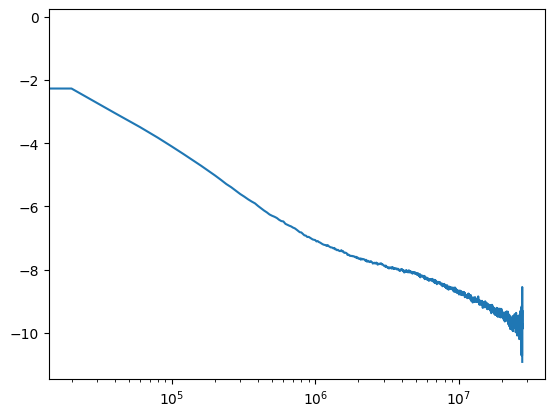

In [ ]:
matr = matr1
z=np.zeros(len(matr))
for i in range(len(matr)):
  z[i]=np.nanmean(np.diagonal(matr, i))
plt.plot(np.arange(len(matr))*resolution, np.log(z))
plt.xscale('log')

<ipython-input-26-2b5e52de0888>:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(matr, i))
<ipython-input-26-2b5e52de0888>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(matr))*resolution, np.log(z))


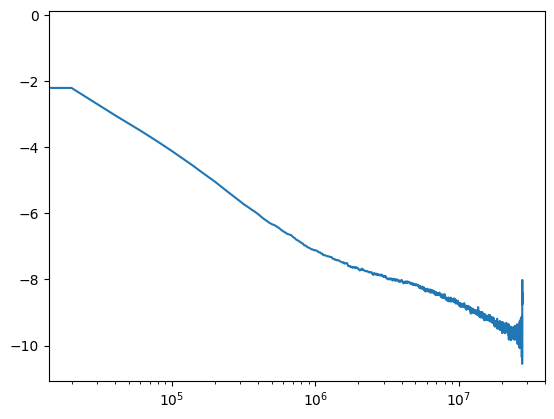

In [ ]:
matr = matr2
z=np.zeros(len(matr))
for i in range(len(matr)):
  z[i]=np.nanmean(np.diagonal(matr, i))
plt.plot(np.arange(len(matr))*resolution, np.log(z))
plt.xscale('log')

<ipython-input-27-d97c426dbb2d>:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(matr, i))
<ipython-input-27-d97c426dbb2d>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(matr))*resolution, np.log(z))


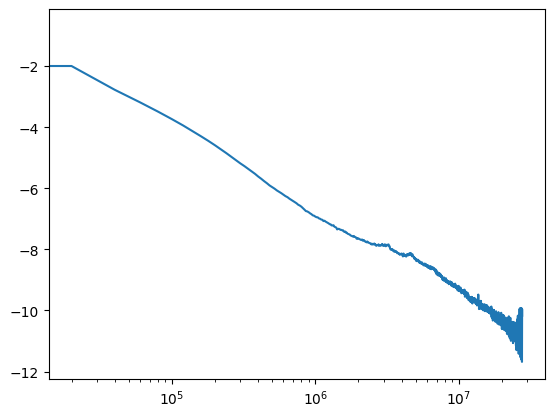

In [ ]:
matr = matr3
z=np.zeros(len(matr))
for i in range(len(matr)):
  z[i]=np.nanmean(np.diagonal(matr, i))
plt.plot(np.arange(len(matr))*resolution, np.log(z))
plt.xscale('log')

<ipython-input-28-ab5ea729c41d>:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(matr, i))
<ipython-input-28-ab5ea729c41d>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(matr))*resolution, np.log(z))


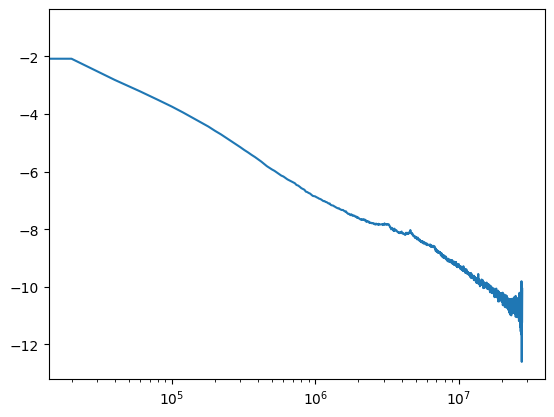

In [ ]:
matr = matr4
z=np.zeros(len(matr))
for i in range(len(matr)):
  z[i]=np.nanmean(np.diagonal(matr, i))
plt.plot(np.arange(len(matr))*resolution, np.log(z))
plt.xscale('log')

Графики схожи, но после расстояния в 10^6 имеются небольшие различия. Предположу, что они обусловлены уменьшением длинн диагоналей и увеличением влияния шума на различные реплики.

g. для выбранного участка найдите insulation score и границы тадов для всех реплик  
h. сравните результаты и постройте графики полученных кривых. Отобразите на них границы  ТАДов.

In [ ]:
windows = [2*resolution,3*resolution, 5*resolution]
insulation_table1 = insulation(clr1, windows, verbose=True)
insulation_table1

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
/usr/local/lib/python3.10/dist-packages/cooltools/api/insulation.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diag_pixels["balanced"] = transform(diag_pixels)
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM


,chrom,start,end,region,is_bad_bin,log2_insulation_score_40000,n_valid_pixels_40000,log2_insulation_score_60000,n_valid_pixels_60000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_40000,boundary_strength_60000,boundary_strength_100000,is_boundary_40000,is_boundary_60000,is_boundary_100000
0,chr2L,0,20000,chr2L,False,NaN,0.0,0.379574,1.0,0.388157,3.0,NaN,NaN,NaN,False,False,False
1,chr2L,20000,40000,chr2L,False,0.069344,1.0,0.359102,3.0,0.300690,7.0,NaN,NaN,NaN,False,False,False
2,chr2L,40000,60000,chr2L,False,0.479690,1.0,-0.066271,6.0,0.004667,12.0,NaN,NaN,NaN,False,False,False
3,chr2L,60000,80000,chr2L,False,-0.511156,1.0,-0.202888,6.0,-0.266302,17.0,0.357841,NaN,NaN,False,False,False
4,chr2L,80000,100000,chr2L,False,-0.153316,1.0,-0.506695,6.0,-0.654509,22.0,NaN,0.022611,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,chrX,22360000,22380000,chrX,False,NaN,0.0,0.467402,4.0,1.012922,10.0,NaN,NaN,NaN,False,False,False
6020,chrX,22380000,22400000,chrX,False,0.225000,1.0,0.530787,1.0,0.864275,5.0,NaN,NaN,NaN,False,False,False
6021,chrX,22400000,22420000,chrX,False,NaN,0.0,0.530787,1.0,0.763719,2.0,NaN,NaN,NaN,False,False,False
6022,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [ ]:
insulation_table2 = insulation(clr2, windows, verbose=True)
insulation_table2

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM


,chrom,start,end,region,is_bad_bin,log2_insulation_score_40000,n_valid_pixels_40000,log2_insulation_score_60000,n_valid_pixels_60000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_40000,boundary_strength_60000,boundary_strength_100000,is_boundary_40000,is_boundary_60000,is_boundary_100000
0,chr2L,0,20000,chr2L,False,NaN,0.0,0.506900,1.0,0.387433,3.0,NaN,NaN,NaN,False,False,False
1,chr2L,20000,40000,chr2L,False,0.184032,1.0,0.460364,3.0,0.387859,7.0,NaN,NaN,NaN,False,False,False
2,chr2L,40000,60000,chr2L,False,0.706846,1.0,-0.047285,6.0,0.028437,12.0,NaN,NaN,NaN,False,False,False
3,chr2L,60000,80000,chr2L,False,-0.838428,1.0,-0.194707,6.0,-0.244093,17.0,1.81223,NaN,NaN,True,False,False
4,chr2L,80000,100000,chr2L,False,-0.119342,1.0,-0.559880,6.0,-0.641793,22.0,NaN,0.115195,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,chrX,22360000,22380000,chrX,False,NaN,0.0,0.551053,4.0,1.009246,10.0,NaN,NaN,NaN,False,False,False
6020,chrX,22380000,22400000,chrX,False,0.209630,1.0,0.550788,1.0,0.753150,5.0,NaN,NaN,NaN,False,False,False
6021,chrX,22400000,22420000,chrX,False,NaN,0.0,0.550788,1.0,0.821697,2.0,NaN,NaN,NaN,False,False,False
6022,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [ ]:
insulation_table3 = insulation(clr3, windows, verbose=True)
insulation_table3

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM


,chrom,start,end,region,is_bad_bin,log2_insulation_score_40000,n_valid_pixels_40000,log2_insulation_score_60000,n_valid_pixels_60000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_40000,boundary_strength_60000,boundary_strength_100000,is_boundary_40000,is_boundary_60000,is_boundary_100000
0,chr2L,0,20000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
1,chr2L,20000,40000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
2,chr2L,40000,60000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
3,chr2L,60000,80000,chr2L,False,NaN,0.0,1.366510,1.0,1.341422,3.0,NaN,NaN,NaN,False,False,False
4,chr2L,80000,100000,chr2L,False,1.092718,1.0,1.055479,3.0,1.061664,7.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,chrX,22360000,22380000,chrX,False,NaN,0.0,0.442750,2.0,0.886170,6.0,NaN,NaN,NaN,False,False,False
6020,chrX,22380000,22400000,chrX,False,NaN,0.0,NaN,0.0,0.788284,2.0,NaN,NaN,NaN,False,False,False
6021,chrX,22400000,22420000,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
6022,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [ ]:
insulation_table4 = insulation(clr4, windows, verbose=True)
insulation_table4

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM


,chrom,start,end,region,is_bad_bin,log2_insulation_score_40000,n_valid_pixels_40000,log2_insulation_score_60000,n_valid_pixels_60000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_40000,boundary_strength_60000,boundary_strength_100000,is_boundary_40000,is_boundary_60000,is_boundary_100000
0,chr2L,0,20000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
1,chr2L,20000,40000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
2,chr2L,40000,60000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
3,chr2L,60000,80000,chr2L,False,NaN,0.0,1.305918,1.0,1.278432,3.0,NaN,NaN,NaN,False,False,False
4,chr2L,80000,100000,chr2L,False,1.043938,1.0,1.005414,3.0,1.041492,7.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,chrX,22360000,22380000,chrX,False,NaN,0.0,0.553181,2.0,0.923649,6.0,NaN,NaN,NaN,False,False,False
6020,chrX,22380000,22400000,chrX,False,NaN,0.0,NaN,0.0,0.838133,2.0,NaN,NaN,NaN,False,False,False
6021,chrX,22400000,22420000,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
6022,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [ ]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from skimage.filters import threshold_li, threshold_otsu

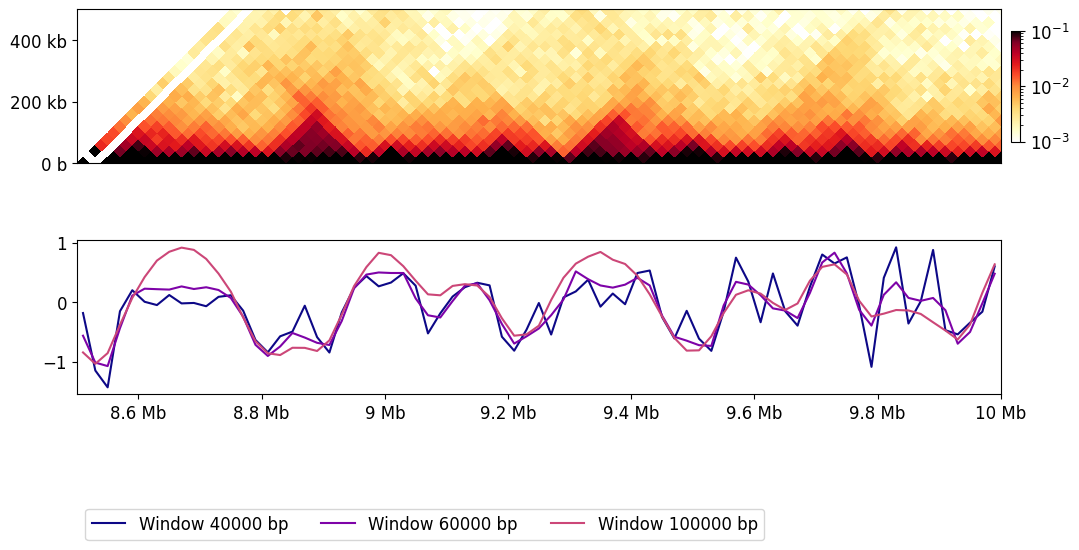

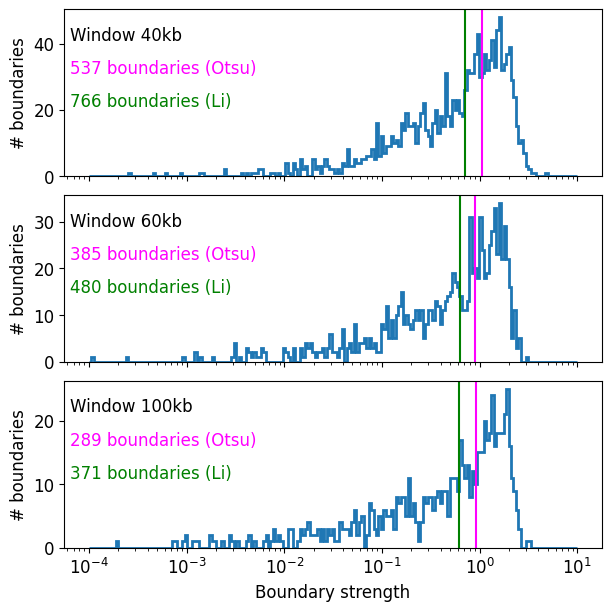

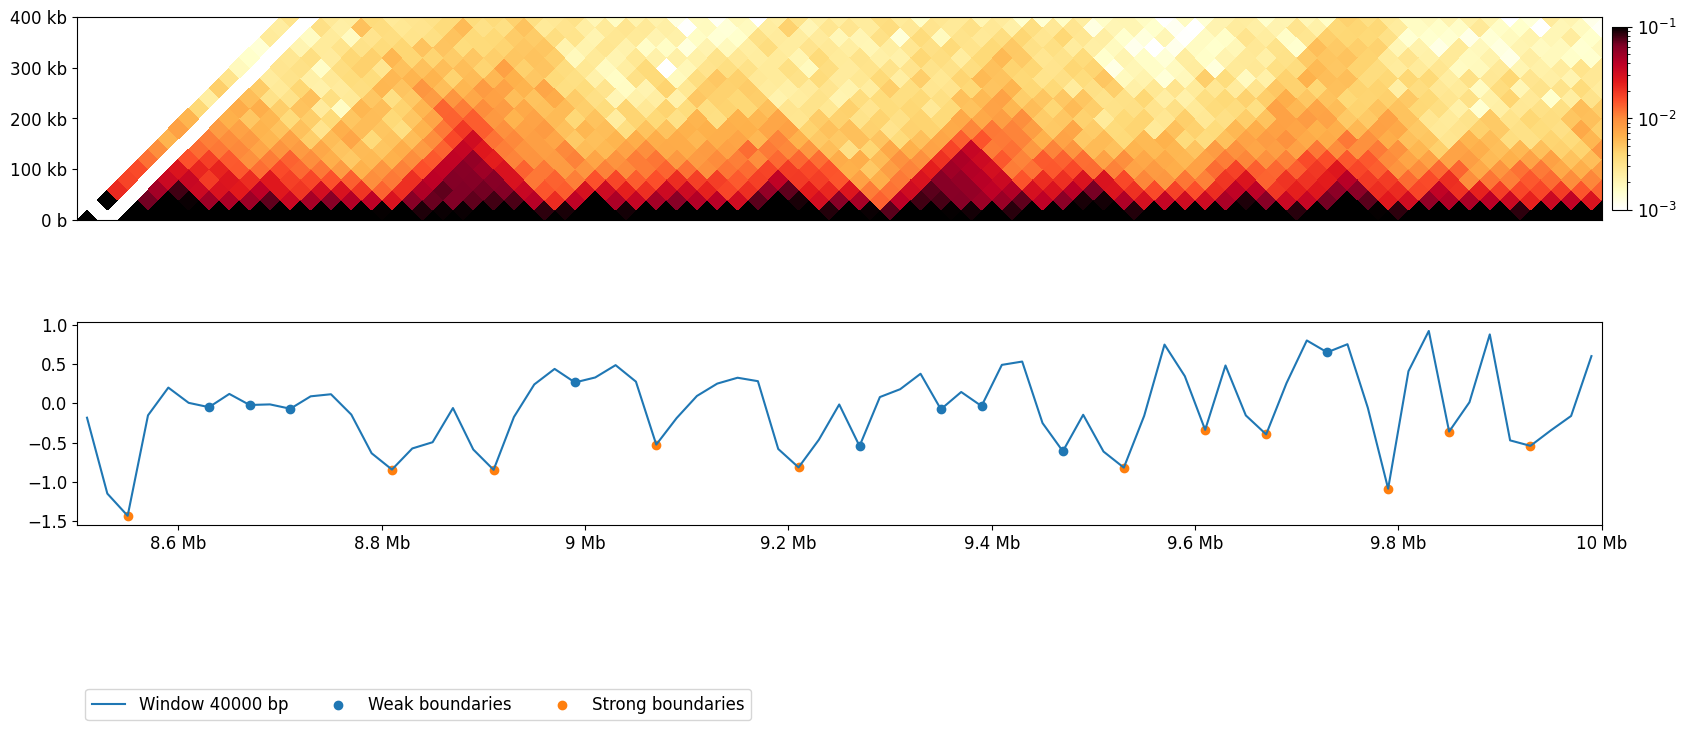

In [ ]:
insulation_table = insulation_table1
matr = matr1

plt.rcParams['font.size'] = 12

start = 8_500_000
end = start + 1_500_000
region = ('chr3R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = matr
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 5*windows[2])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

histkwargs = dict(
    bins=10**np.linspace(-4,1,200),
    histtype='step',
    lw=2,
)

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])
boundaries1 = boundaries

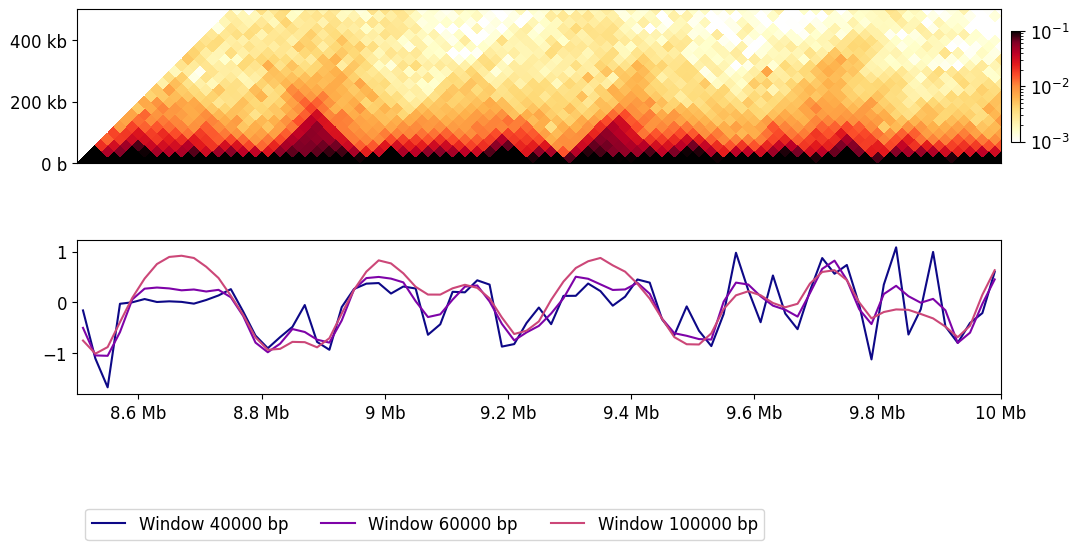

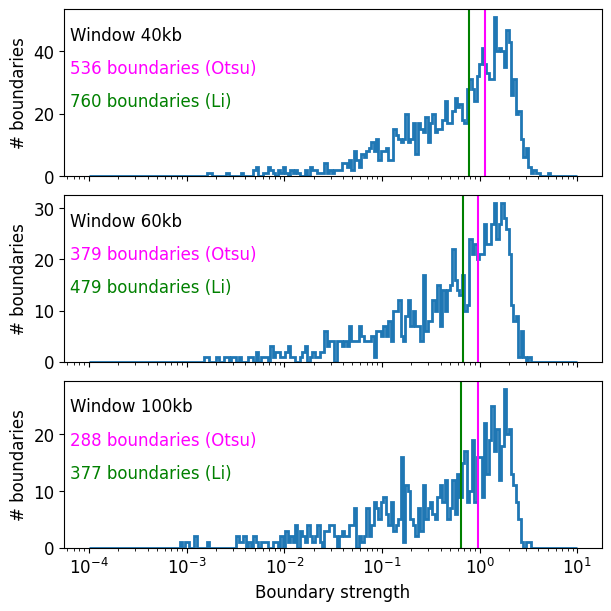

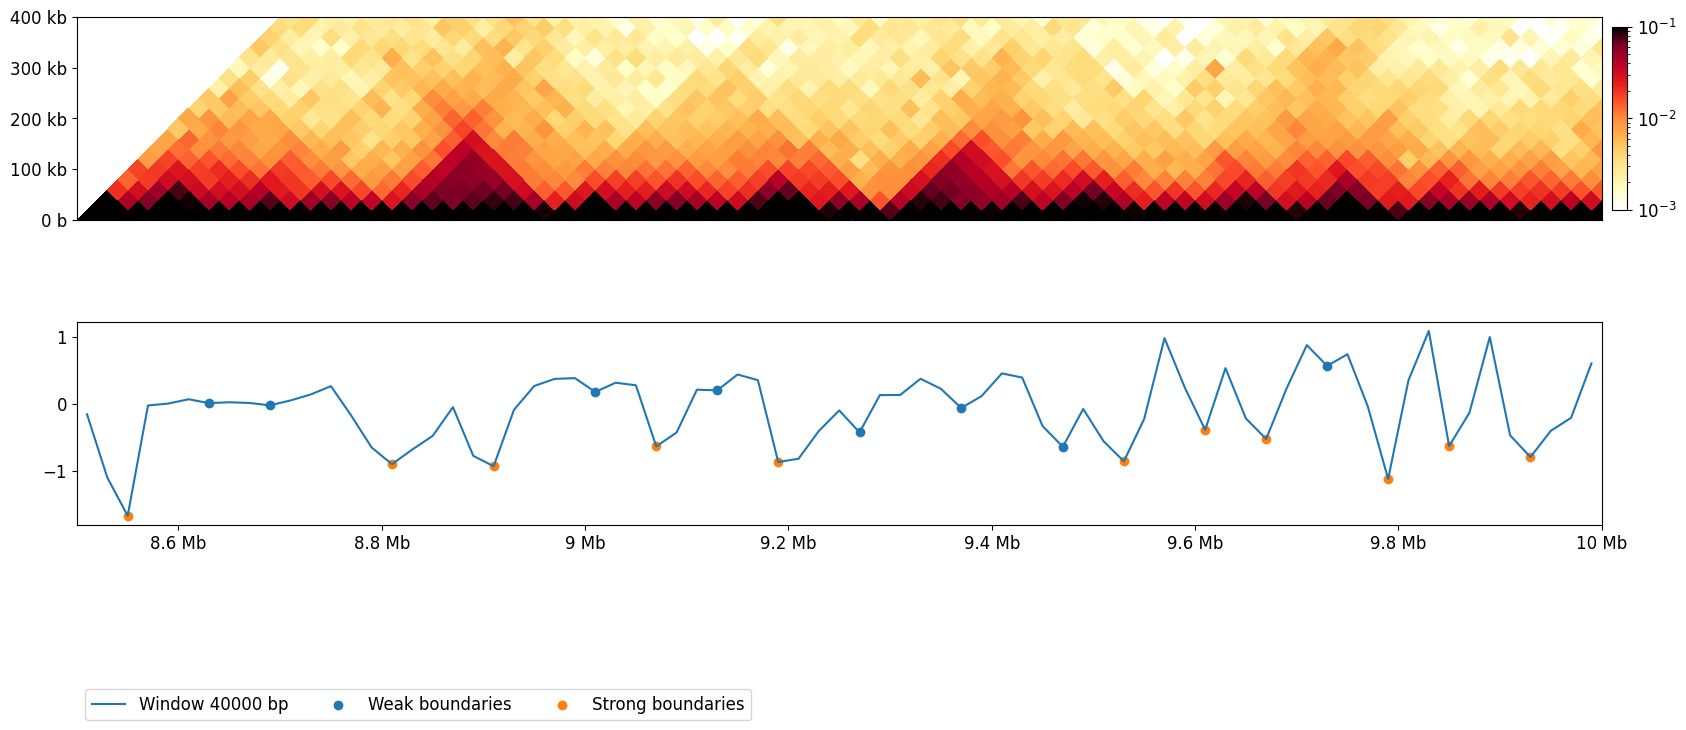

In [ ]:
insulation_table = insulation_table2
matr = matr2

plt.rcParams['font.size'] = 12

start = 8_500_000
end = start + 1_500_000
region = ('chr3R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = matr
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 5*windows[2])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

histkwargs = dict(
    bins=10**np.linspace(-4,1,200),
    histtype='step',
    lw=2,
)

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])
boundaries2 = boundaries

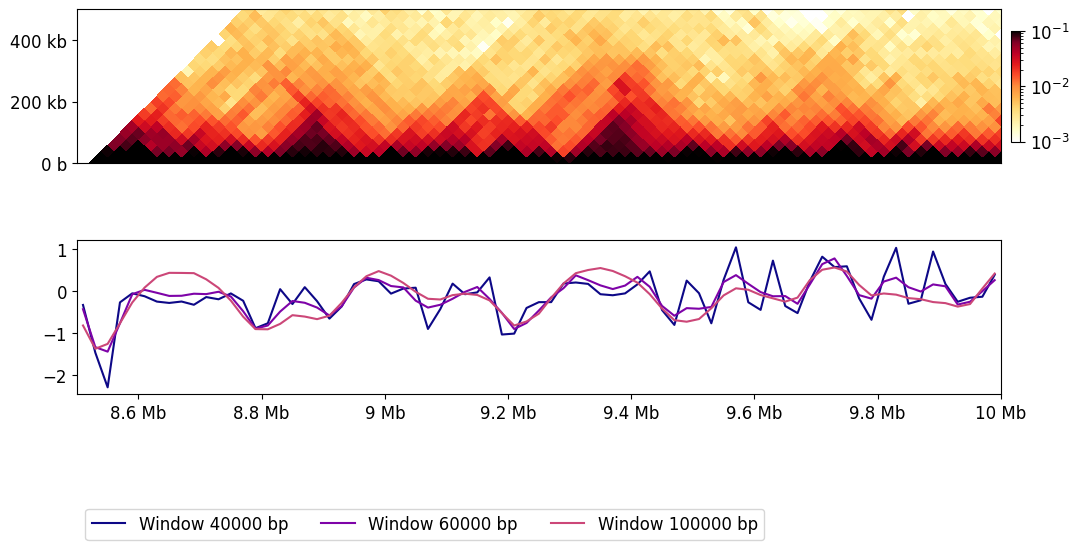

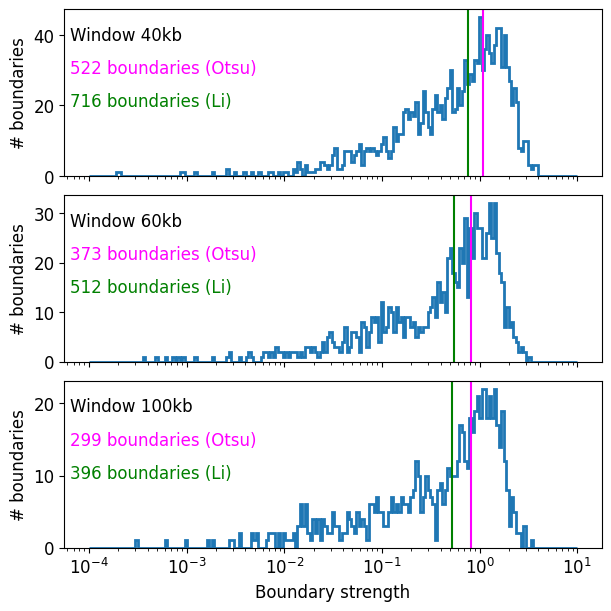

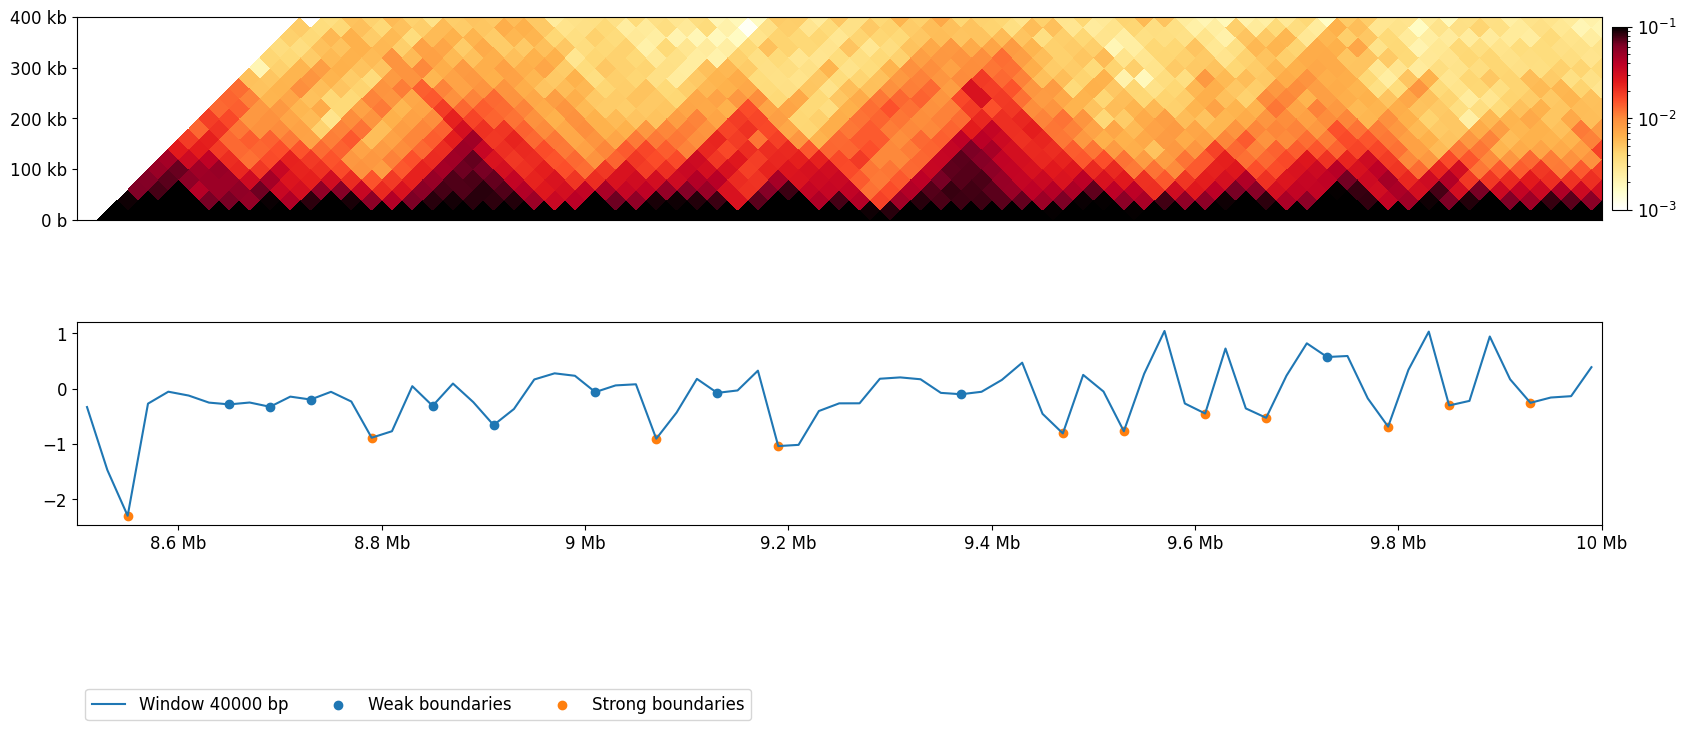

In [ ]:
insulation_table = insulation_table3
matr = matr3

plt.rcParams['font.size'] = 12

start = 8_500_000
end = start + 1_500_000
region = ('chr3R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = matr
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 5*windows[2])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

histkwargs = dict(
    bins=10**np.linspace(-4,1,200),
    histtype='step',
    lw=2,
)

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])
boundaries3 = boundaries

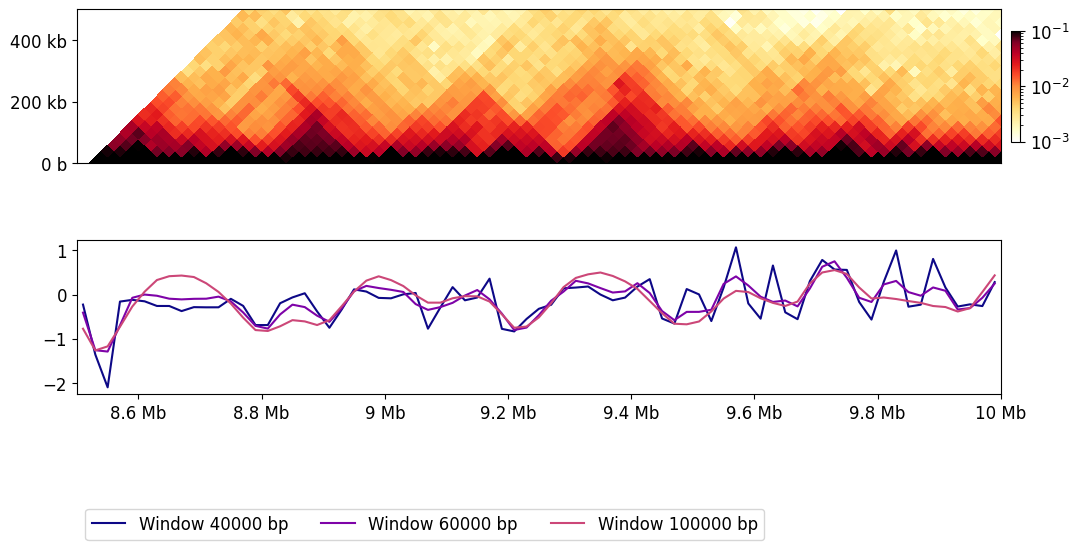

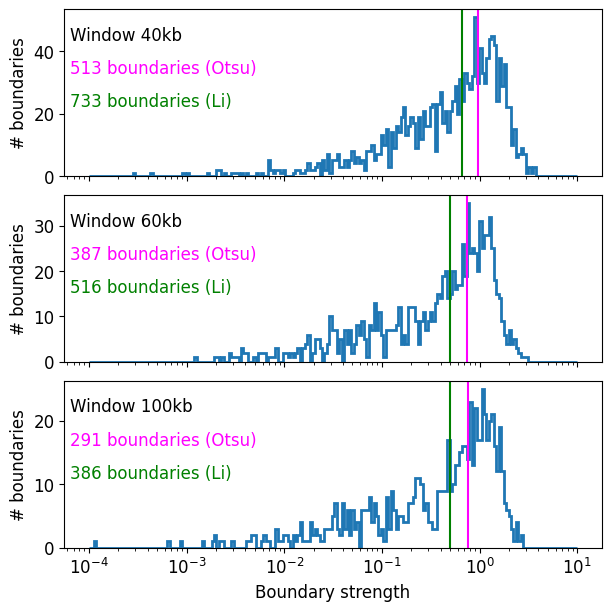

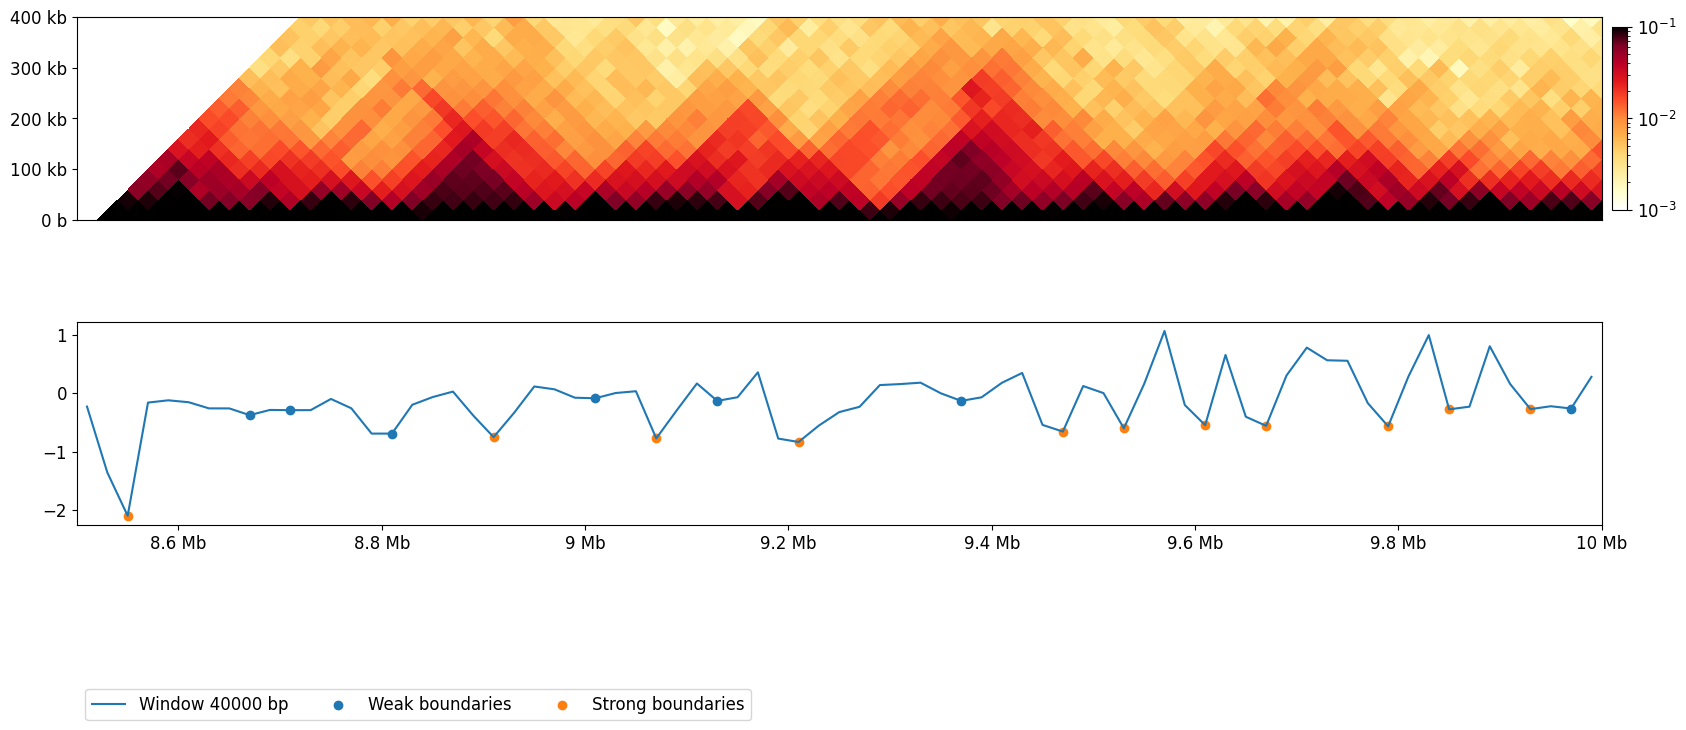

In [ ]:
insulation_table = insulation_table4
matr = matr4

plt.rcParams['font.size'] = 12

start = 8_500_000
end = start + 1_500_000
region = ('chr3R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = matr
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 5*windows[2])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

histkwargs = dict(
    bins=10**np.linspace(-4,1,200),
    histtype='step',
    lw=2,
)

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])
boundaries4 = boundaries

Границы тадов получились довольно похожими, есть некоторые различия, но общая картина примерно одинаковая

i. Создайте 4 bed файла с границами ТАДов.В поле score добавьте силу границы.

In [ ]:
rec={'start': 'chromStart', 'end': 'chromEnd', 'boundary_strength_40000': 'score'}
databed1 = boundaries1[['chrom', 'start', 'end', 'boundary_strength_40000']].rename(columns=rec)
databed1.to_csv('/content/beds/tads1.bed', sep='\t')
databed2 = boundaries1[['chrom', 'start', 'end', 'boundary_strength_40000']].rename(columns=rec)
databed2.to_csv('/content/beds/tads2.bed', sep='\t')
databed3 = boundaries1[['chrom', 'start', 'end', 'boundary_strength_40000']].rename(columns=rec)
databed3.to_csv('/content/beds/tads3.bed', sep='\t')
databed4 = boundaries1[['chrom', 'start', 'end', 'boundary_strength_40000']].rename(columns=rec)
databed4.to_csv('/content/beds/tads4.bed', sep='\t')